In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [3]:
# delimiter : str, optional.The default is whitespace.
datas = np.loadtxt("data.txt", delimiter=",", dtype="float64")

In [4]:
datas.dtype, datas.shape

(dtype('float64'), (47, 3))

In [5]:
df = pd.DataFrame(datas, columns=['x1', 'x2', 'y'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
x1    47 non-null float64
x2    47 non-null float64
y     47 non-null float64
dtypes: float64(3)
memory usage: 1.2 KB


In [7]:
df.describe()

,x1,x2,y
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


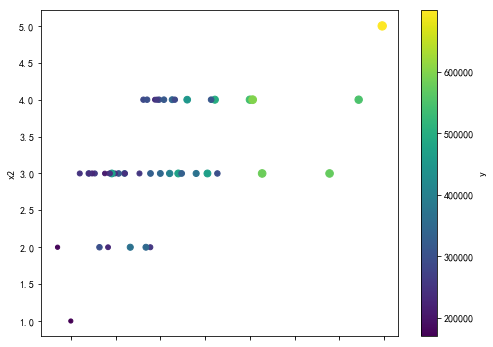

In [8]:
#暂时不会画三维图，使用二维代替
df.plot.scatter(x='x1', y='x2', c='y', s=df['y']/10000, colormap='viridis', figsize=(8,6))

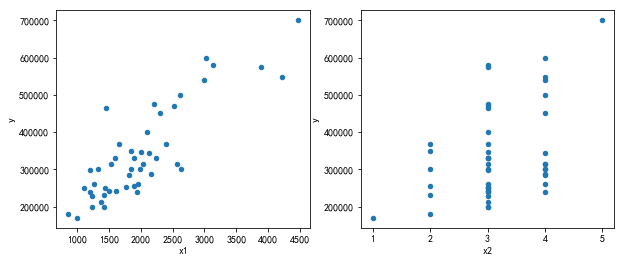

In [9]:
#可以看出来x1的权重应该比x2大
fig, ax = plt.subplots(1,2 ,figsize=(10,4))
df.plot.scatter(x='x1', y='y', ax=ax[0])
df.plot.scatter(x='x2', y='y', ax=ax[1])

下面是损失函数，以及对各个变量的偏导数公式：
![](assets/LinearRegression01.png)

In [10]:
# 假设y = ax0 + b*x1 + c*x2，暂时不会矩阵的求导
# 其实上面的x0对每个行数据都是1，所以偏导公式都是可以用下面的一个

def getGradient(x, theta, y):
    pass

In [11]:
# 构建x的矩阵
x = datas[:, 0:-1]
# 填充x0
x0 = np.ones((datas.shape[0],1))
x = np.hstack([x0, x])
x.shape

(47, 3)

In [12]:
#x 一定要用归一化等，不然要迭代好久，而且对于这个例子可能震荡的特别厉害，x2的值太大了，计算出来的导数也太大
# 刚开始就被坑了，一时计算出nan，而是损失函数会增大，主要是一个导数计算出来太大了

# 归一化feature
def featureNormaliza(X):
    X_norm = np.array(X)            #将X转化为numpy数组对象，才可以进行矩阵的运算
    #定义所需变量
    mu = np.zeros((1,X.shape[1]))   
    sigma = np.zeros((1,X.shape[1]))
    
    mu = np.mean(X_norm,0)          # 求每一列的平均值（0指定为列，1代表行）
    sigma = np.std(X_norm,0)        # 求每一列的标准差
    for i in range(X.shape[1]):     # 遍历列
        X_norm[:,i] = (X_norm[:,i]-mu[i])/sigma[i]  # 归一化
    
    return X_norm,mu,sigma

X,mu,sigma = featureNormaliza(x[:,1:])
x[:,1:] = X

In [13]:
x.mean(axis=0)

array([ 1.00000000e+00, -9.44870659e-18,  2.48028548e-16])

In [14]:
# 需要求的参数，设置初始值
theta = np.full((x.shape[1],1), 1)
theta

array([[1],
       [1],
       [1]])

In [15]:
y = datas[:,-1]
y = y.reshape(-1,1)   #将行向量转化为列
y.shape

(47, 1)

![](assets/LinearRegression01.png)

In [16]:
def getGradient(x, theta, y):
    h_y = (np.dot(x, theta) - y) 
    
    gradient0 = (h_y * x[:, 0].reshape(-1,1)).mean()
    gradient1 = (h_y * x[:, 1].reshape(-1,1)).mean()
    gradient2 = (h_y * x[:, 2].reshape(-1,1)).mean()
    
    return (gradient0, gradient1, gradient2)

In [17]:
# 计算代价函数
def computerCost(x,y,theta):    
    return ( (np.dot(x, theta) - y) ** 2 ).mean()/2

In [18]:
theta = np.full((x.shape[1],1), 10)
alpha = 0.01 # 步长
num_iters = 0
max_iters = 100000
c = 0.001 #两次结果小于这个值就停止迭代
preCost = 0
while(True):    
    gradient0, gradient1, gradient2 = getGradient(x, theta, y)
    theta = theta - np.array([gradient0, gradient1, gradient2]).reshape(-1,1) * alpha        
    cost = computerCost(x,y,theta)    
    if(num_iters != 0 and (preCost - cost < c or num_iters > max_iters) ):
        break
    if(num_iters % 1000 == 0):       
        print(cost)
    preCost = cost
    num_iters += 1
print(num_iters) 
print(cost)
#2043280050.603164

64292885013.76273
2043497024.7329688
2043280082.6423357
2641
2043280050.715115


In [19]:
# 340412.6595744681
# [109447.79646964  -6578.35485416]
# 上面是使用sklearn得到的借据和权重(执行了相同的归一化)，和我这差不多，因为公式都一样，损失函数也一样
theta

array([[340412.65957347],
       [109447.2913179 ],
       [ -6577.84970242]])

In [20]:
# 测试学习效果（预测）
def predict(mu,sigma,theta):
    result = 0
    # 注意归一化
    predict = np.array([2104,3])
    norm_predict = (predict-mu)/sigma
    final_predict = np.hstack((np.ones((1)),norm_predict))
    
    result = np.dot(final_predict,theta)    # 预测结果
    return result

In [21]:
predict(mu, sigma, theta)

array([356282.92974171])

In [22]:
# 这个结果似乎还是可以的,平均误差
# 这里的y的shape一定要是(,1),不然会广播计算
np.mean(np.abs(np.dot(x, theta) -y) / y)

0.15607417883441707